In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [39]:
digits = load_digits()

In [40]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [41]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [42]:
digits.images[0].shape

(8, 8)

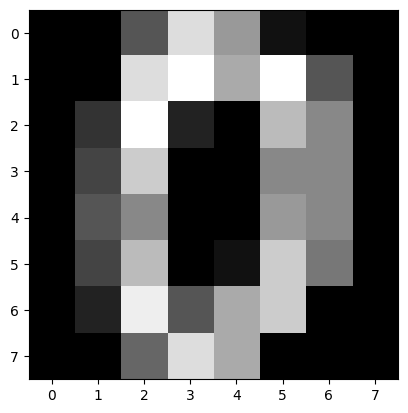

In [43]:
# display images
plt.imshow(digits.images[0],cmap='gray')

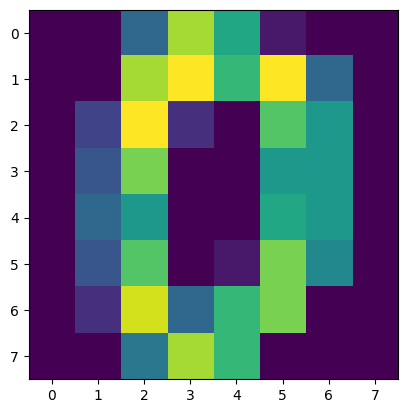

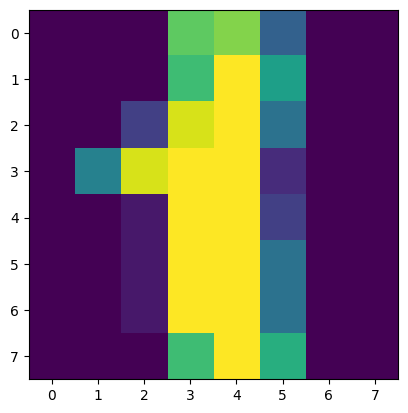

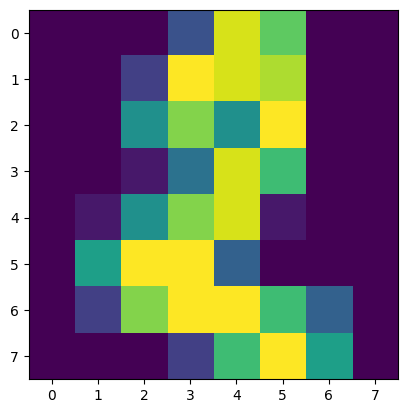

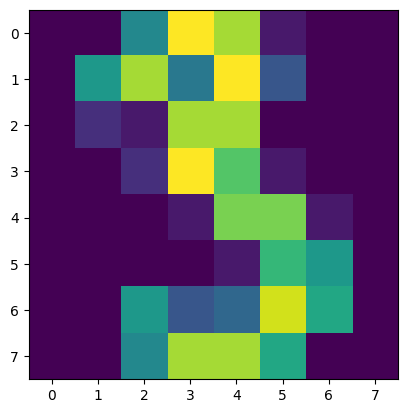

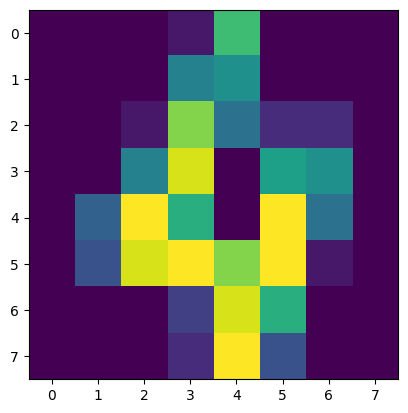

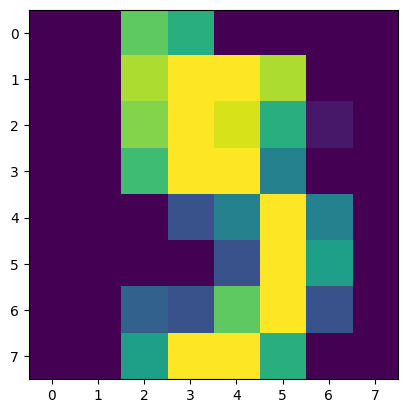

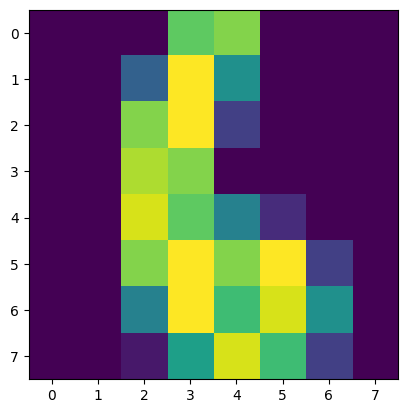

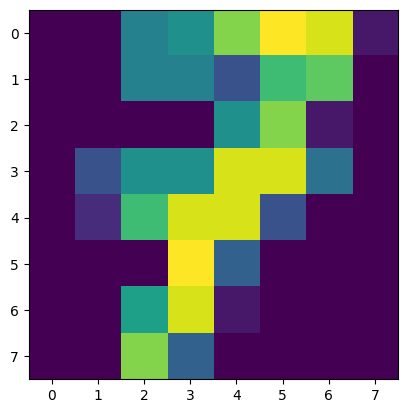

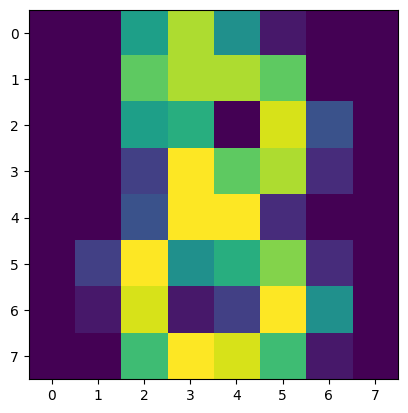

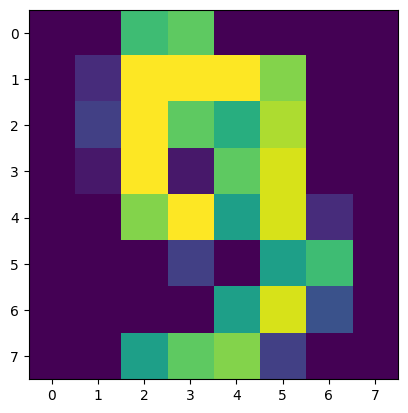

In [44]:
for i in range(10):
    plt.imshow(digits.images[i])
    plt.show()

In [45]:
df = pd.DataFrame(digits.data,columns=digits.feature_names)

In [46]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [47]:
df=pd.concat([df,pd.DataFrame(digits.target,columns=['digit'])],axis='columns')

In [48]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,digit
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [49]:
x, y = df.drop(columns='digit'), df.digit

In [50]:
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: digit, Length: 1797, dtype: int64

In [51]:
x

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [52]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [53]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)

SVC()

In [54]:
model.score(x_test, y_test)

0.9861111111111112

In [55]:
p = model.predict(x_test)

In [56]:
x_test

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1370,0.0,0.0,13.0,16.0,16.0,9.0,0.0,0.0,0.0,2.0,...,11.0,0.0,0.0,0.0,11.0,16.0,16.0,15.0,1.0,0.0
431,0.0,0.0,6.0,15.0,14.0,2.0,0.0,0.0,0.0,5.0,...,5.0,0.0,0.0,1.0,8.0,15.0,16.0,12.0,1.0,0.0
526,0.0,0.0,0.0,9.0,14.0,6.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,1.0,11.0,16.0,12.0,0.0,0.0
401,0.0,1.0,8.0,8.0,9.0,13.0,8.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,11.0,16.0,9.0,0.0,0.0,0.0
1274,0.0,4.0,7.0,13.0,16.0,16.0,4.0,0.0,0.0,11.0,...,0.0,0.0,0.0,4.0,14.0,16.0,13.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,0.0,0.0,5.0,16.0,14.0,2.0,0.0,0.0,0.0,1.0,...,10.0,0.0,0.0,0.0,6.0,16.0,14.0,12.0,9.0,0.0
1522,0.0,0.0,0.0,1.0,10.0,16.0,8.0,0.0,0.0,1.0,...,3.0,0.0,0.0,0.0,0.0,0.0,10.0,16.0,7.0,0.0
861,0.0,0.0,2.0,14.0,15.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,15.0,13.0,2.0,0.0,0.0
874,0.0,0.0,7.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,4.0,15.0,16.0,7.0,0.0,0.0


In [65]:
xt  = x_test.values

In [66]:
xt

array([[ 0.,  0., 13., ..., 15.,  1.,  0.],
       [ 0.,  0.,  6., ..., 12.,  1.,  0.],
       [ 0.,  0.,  0., ..., 12.,  0.,  0.],
       ...,
       [ 0.,  0.,  2., ...,  2.,  0.,  0.],
       [ 0.,  0.,  7., ...,  7.,  0.,  0.],
       [ 0.,  0.,  4., ..., 15.,  5.,  0.]])

In [67]:
xt[0].shape

(64,)

In [68]:
# Transform xt elements into 8x8 matrix
xt_reshaped = xt.reshape(len(xt),8,8)

In [69]:
p = model.predict(xt)
p

/home/soham/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([3, 3, 0, 5, 5, 0, 5, 3, 4, 6, 7, 1, 7, 8, 2, 5, 4, 1, 2, 5, 2, 7,
       1, 4, 9, 5, 4, 7, 2, 2, 7, 6, 3, 4, 3, 1, 3, 7, 0, 1, 5, 4, 1, 6,
       1, 9, 3, 5, 5, 7, 8, 2, 8, 9, 8, 1, 7, 1, 4, 7, 8, 5, 8, 5, 0, 2,
       7, 0, 9, 5, 2, 2, 0, 0, 4, 8, 1, 9, 4, 6, 1, 5, 7, 1, 7, 1, 0, 8,
       3, 3, 0, 7, 1, 1, 9, 5, 6, 1, 6, 2, 5, 8, 8, 1, 1, 3, 1, 4, 2, 1,
       1, 3, 9, 8, 3, 7, 7, 8, 2, 5, 9, 5, 2, 6, 3, 1, 6, 0, 9, 4, 7, 4,
       7, 0, 9, 5, 8, 9, 1, 9, 9, 4, 6, 2, 3, 3, 8, 8, 4, 7, 5, 7, 8, 8,
       3, 1, 2, 3, 6, 3, 4, 9, 5, 4, 5, 8, 8, 1, 1, 6, 2, 4, 0, 6, 1, 2,
       7, 6, 4, 5, 4, 8, 0, 9, 1, 8, 9, 2, 5, 5, 1, 3, 3, 5, 9, 0, 6, 5,
       9, 9, 8, 8, 2, 2, 5, 1, 8, 2, 7, 7, 2, 2, 9, 1, 9, 3, 8, 9, 0, 7,
       5, 8, 5, 1, 1, 2, 9, 7, 8, 1, 0, 2, 8, 4, 3, 4, 7, 5, 9, 2, 8, 4,
       9, 2, 8, 1, 4, 3, 2, 8, 1, 9, 4, 9, 7, 0, 8, 9, 2, 8, 7, 2, 6, 2,
       6, 6, 6, 7, 0, 9, 0, 2, 6, 8, 3, 5, 5, 1, 4, 6, 4, 6, 1, 0, 2, 8,
       3, 5, 9, 8, 4, 1, 6, 6, 1, 4, 9, 5, 9, 7, 4,

3


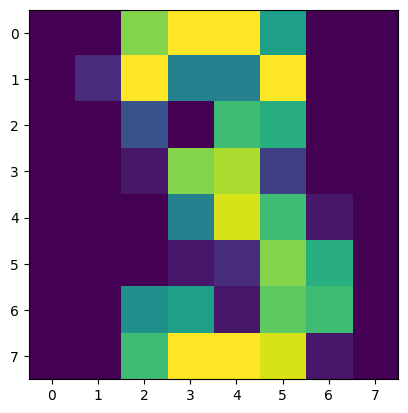

3


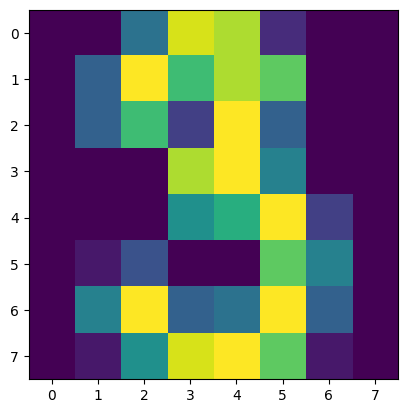

0


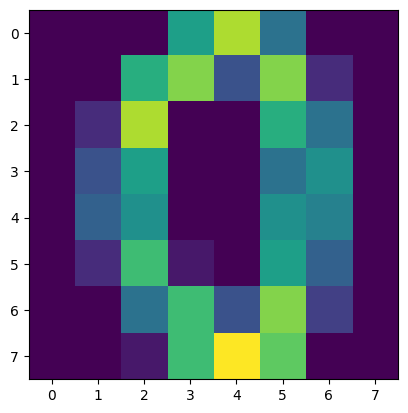

5


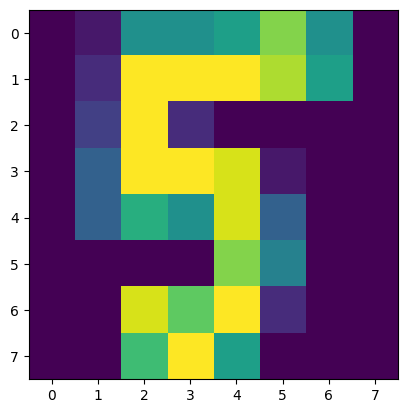

5


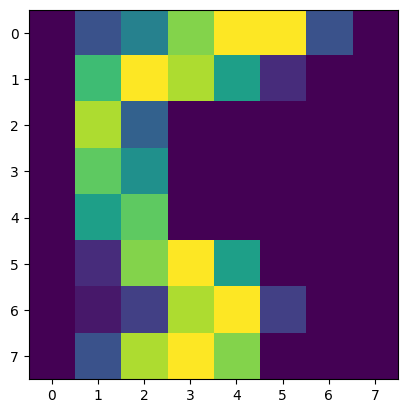

0


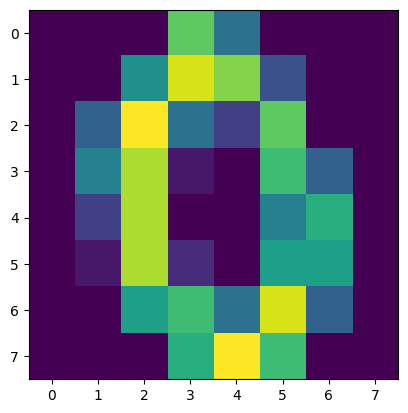

5


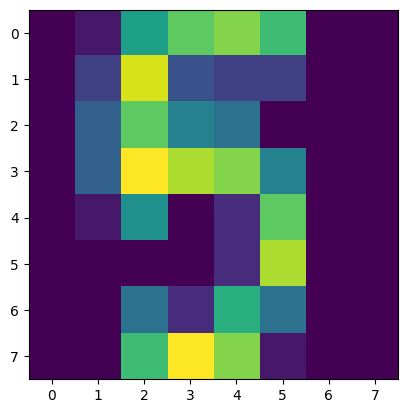

3


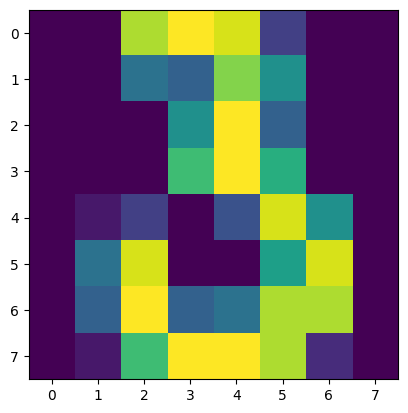

4


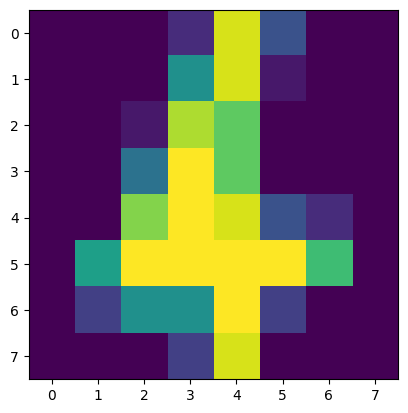

6


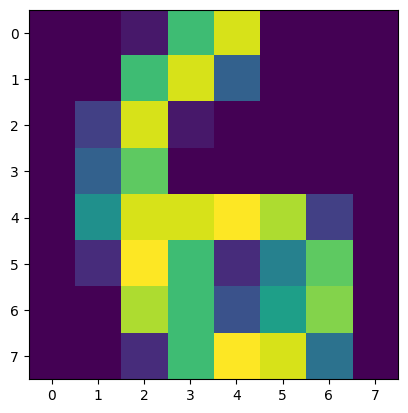

In [70]:
for i in range(10):
    print(p[i])
    plt.imshow(xt_reshaped[i])
    plt.show()